In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# create random latittude and longitude
lats = np.random.uniform(low = -90.000, high = 90.000, size  = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [7]:
coordinates = list(lat_lngs)
coordinates

[(33.927256139480804, -99.0340394458628),
 (-72.43030945398206, 104.49030257834983),
 (54.13800159196052, -167.7246382581557),
 (70.57276030501095, 43.70590454930013),
 (77.05713160847739, 18.11711144937027),
 (82.22829452855436, 78.56829745591529),
 (-13.89032121481435, 98.55139401007477),
 (-69.93369179162922, 86.76160326110067),
 (-89.3033707426882, 122.99330886719224),
 (-1.3614505459411532, -98.97076134412168),
 (-39.35860277660422, -170.58194503512024),
 (-11.538157565513032, 53.369814014804405),
 (-79.90820655075575, 124.96541949235291),
 (45.73417194479953, -147.6164378944254),
 (7.234017332209362, -70.05789144349319),
 (-37.0372447962084, -16.722092289185383),
 (-57.5256703136859, -92.37660651668897),
 (-74.41663068370383, 13.557527558211973),
 (-29.41915116692278, -49.34153563873795),
 (64.02720462376394, -19.71817306496152),
 (-11.966936941536531, -87.41517184947043),
 (55.67549069148481, 16.77856173315911),
 (-59.99584622763801, -80.37100422680598),
 (-75.59629179445552, 95

In [8]:
from citipy import citipy

In [9]:
# Create a list
cities = []
# find nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [10]:
import requests
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# city_url = url + "&q=" + "sao+filipe"
# city_weather = requests.get(city_url)
# city_weather.json().keys()
# print(url)

In [17]:
# c_data = city_weather.json()
# c_data

In [18]:
# c_data["sys"]

In [19]:
# boston_data["sys"]["country"]

In [20]:
# boston_data["dt"]

In [21]:
# cities

In [22]:
# lat = boston_data["coord"]["lat"]
# lng = boston_data["coord"]["lon"]
# max_temp = boston_data["main"]["temp_max"]
# humidity = boston_data["main"]["humidity"]
# clouds = boston_data["clouds"]["all"]
# wind = boston_data["wind"]["speed"]
# print(lat, lng, max_temp, humidity, clouds, wind)

In [12]:
import time
from datetime import datetime

# date = boston_data["dt"]
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vernon
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kamenka
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | labuhan
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | sambava
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | guasdualito
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | torres
Processing Record 19 of Set 1 | hvolsvollur
Processing Record 20 of Set 1 | chicama
Processing Record 21 of Set 1 | kalmar
Processing Record 22 of Set 1 | columbus
Processing Record 23 of Set 1 | ponta do sol


Processing Record 86 of Set 2 | junin
Processing Record 87 of Set 2 | kapoeta
Processing Record 88 of Set 2 | mackenzie
Processing Record 89 of Set 2 | oistins
Processing Record 90 of Set 2 | bac lieu
Processing Record 91 of Set 2 | pacific grove
Processing Record 92 of Set 2 | natal
Processing Record 93 of Set 2 | togur
Processing Record 94 of Set 2 | valdivia
Processing Record 95 of Set 2 | haputale
Processing Record 96 of Set 2 | qaqortoq
Processing Record 97 of Set 2 | yarmouth
Processing Record 98 of Set 2 | erzin
Processing Record 99 of Set 2 | cobija
Processing Record 100 of Set 2 | khandbari
Processing Record 1 of Set 3 | hobart
Processing Record 2 of Set 3 | katsuura
Processing Record 3 of Set 3 | nuuk
Processing Record 4 of Set 3 | arrecife
Processing Record 5 of Set 3 | hilo
Processing Record 6 of Set 3 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 3 | volot
Processing Record 8 of Set 3 | henties bay
Processing Record 9 of Set 3 | sept-iles
Processing Rec

Processing Record 77 of Set 4 | paamiut
Processing Record 78 of Set 4 | la crosse
Processing Record 79 of Set 4 | viedma
Processing Record 80 of Set 4 | adre
Processing Record 81 of Set 4 | huanren
Processing Record 82 of Set 4 | ocampo
Processing Record 83 of Set 4 | jasidih
Processing Record 84 of Set 4 | brive-la-gaillarde
Processing Record 85 of Set 4 | suicheng
Processing Record 86 of Set 4 | krylovskaya
Processing Record 87 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 88 of Set 4 | khuzhir
Processing Record 89 of Set 4 | impfondo
Processing Record 90 of Set 4 | airai
Processing Record 91 of Set 4 | najran
Processing Record 92 of Set 4 | luau
Processing Record 93 of Set 4 | namatanai
Processing Record 94 of Set 4 | san quintin
Processing Record 95 of Set 4 | port hedland
Processing Record 96 of Set 4 | kapit
Processing Record 97 of Set 4 | bereda
Processing Record 98 of Set 4 | barroualie
City not found. Skipping...
Processing Record 99 of Set 4 | mehamn
Pro

Processing Record 67 of Set 6 | montepuez
Processing Record 68 of Set 6 | pangnirtung
Processing Record 69 of Set 6 | altamira
Processing Record 70 of Set 6 | lasa
Processing Record 71 of Set 6 | blythe
Processing Record 72 of Set 6 | sabang
Processing Record 73 of Set 6 | arroyo grande
Processing Record 74 of Set 6 | caohai
Processing Record 75 of Set 6 | matagami
Processing Record 76 of Set 6 | bolshiye uki
City not found. Skipping...
Processing Record 77 of Set 6 | nador
Processing Record 78 of Set 6 | micheweni
Processing Record 79 of Set 6 | turayf
Processing Record 80 of Set 6 | leningradskiy
Processing Record 81 of Set 6 | coyula
Processing Record 82 of Set 6 | urcos
Processing Record 83 of Set 6 | fairbanks
Processing Record 84 of Set 6 | sibolga
Processing Record 85 of Set 6 | lamar
Processing Record 86 of Set 6 | dayong
Processing Record 87 of Set 6 | mendi
Processing Record 88 of Set 6 | keetmanshoop
Processing Record 89 of Set 6 | dingle
Processing Record 90 of Set 6 | baso

In [14]:
city_data

[{'City': 'Vernon',
  'Lat': 50.2581,
  'Lng': -119.2691,
  'Max Temp': 21.61,
  'Humidity': 86,
  'Cloudiness': 100,
  'Wind Speed': 2.3,
  'Country': 'CA',
  'Date': '2022-02-03 03:36:16'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 43.38,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 3.31,
  'Country': 'US',
  'Date': '2022-02-03 03:37:16'},
 {'City': 'Bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 39.65,
  'Humidity': 90,
  'Cloudiness': 75,
  'Wind Speed': 0,
  'Country': 'US',
  'Date': '2022-02-03 03:37:17'},
 {'City': 'Kamenka',
  'Lat': 51.3223,
  'Lng': 42.7678,
  'Max Temp': 31.75,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 2.26,
  'Country': 'RU',
  'Date': '2022-02-03 03:33:52'},
 {'City': 'Longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': 15.64,
  'Humidity': 62,
  'Cloudiness': 0,
  'Wind Speed': 11.5,
  'Country': 'SJ',
  'Date': '2022-02-03 03:37:17'},
 {'City': 'Dikson',
  'Lat': 73.5069,
  '

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vernon,50.2581,-119.2691,21.61,86,100,2.30,CA,2022-02-03 03:36:16
1,Albany,42.6001,-73.9662,43.38,81,100,3.31,US,2022-02-03 03:37:16
2,Bethel,41.3712,-73.4140,39.65,90,75,0.00,US,2022-02-03 03:37:17
3,Kamenka,51.3223,42.7678,31.75,100,100,2.26,RU,2022-02-03 03:33:52
4,Longyearbyen,78.2186,15.6401,15.64,62,0,11.50,SJ,2022-02-03 03:37:17
...,...,...,...,...,...,...,...,...,...
577,Ipameri,-17.7219,-48.1597,68.13,94,100,4.72,BR,2022-02-03 03:46:33
578,Ust-Nera,64.5667,143.2000,-6.56,99,100,2.46,RU,2022-02-03 03:46:33
579,Kamina,-8.7386,24.9906,62.73,95,100,2.57,CD,2022-02-03 03:46:34
580,Abu Kamal,34.4506,40.9171,47.97,53,95,9.66,SY,2022-02-03 03:46:34


In [16]:
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vernon,CA,2022-02-03 03:36:16,50.2581,-119.2691,21.61,86,100,2.30
1,Albany,US,2022-02-03 03:37:16,42.6001,-73.9662,43.38,81,100,3.31
2,Bethel,US,2022-02-03 03:37:17,41.3712,-73.4140,39.65,90,75,0.00
3,Kamenka,RU,2022-02-03 03:33:52,51.3223,42.7678,31.75,100,100,2.26
4,Longyearbyen,SJ,2022-02-03 03:37:17,78.2186,15.6401,15.64,62,0,11.50
...,...,...,...,...,...,...,...,...,...
577,Ipameri,BR,2022-02-03 03:46:33,-17.7219,-48.1597,68.13,94,100,4.72
578,Ust-Nera,RU,2022-02-03 03:46:33,64.5667,143.2000,-6.56,99,100,2.46
579,Kamina,CD,2022-02-03 03:46:34,-8.7386,24.9906,62.73,95,100,2.57
580,Abu Kamal,SY,2022-02-03 03:46:34,34.4506,40.9171,47.97,53,95,9.66


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
today = time.strftime("%x")
today

'02/03/22'

In [3]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Vernon,CA,2022-02-03 03:36:16,50.2581,-119.2691,21.61,86,100,2.30
1,1,Albany,US,2022-02-03 03:37:16,42.6001,-73.9662,43.38,81,100,3.31
2,2,Bethel,US,2022-02-03 03:37:17,41.3712,-73.4140,39.65,90,75,0.00
3,3,Kamenka,RU,2022-02-03 03:33:52,51.3223,42.7678,31.75,100,100,2.26
4,4,Longyearbyen,SJ,2022-02-03 03:37:17,78.2186,15.6401,15.64,62,0,11.50
...,...,...,...,...,...,...,...,...,...,...
577,577,Ipameri,BR,2022-02-03 03:46:33,-17.7219,-48.1597,68.13,94,100,4.72
578,578,Ust-Nera,RU,2022-02-03 03:46:33,64.5667,143.2000,-6.56,99,100,2.46
579,579,Kamina,CD,2022-02-03 03:46:34,-8.7386,24.9906,62.73,95,100,2.57
580,580,Abu Kamal,SY,2022-02-03 03:46:34,34.4506,40.9171,47.97,53,95,9.66


In [5]:
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

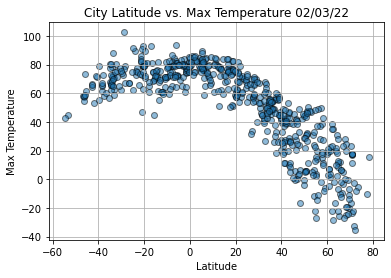

In [8]:
import time
plt.scatter(lats,
           max_temp,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.5, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature " +  time.strftime("%x"))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Weather_data/Fig1.png")

plt.show()

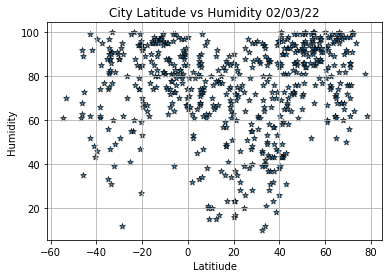

In [14]:
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 0.8, marker = "*",
           alpha = 0.8, label= "Cities")

plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitiude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()
    

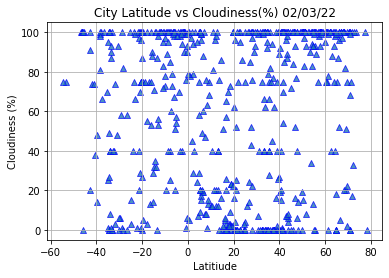

In [28]:
plt.scatter(lats,
           cloudiness,
           edgecolor = "blue", linewidths = 0.8, marker = "^",
           alpha = 0.8, label= "Cities")

plt.title(f"City Latitude vs Cloudiness(%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitiude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()
    

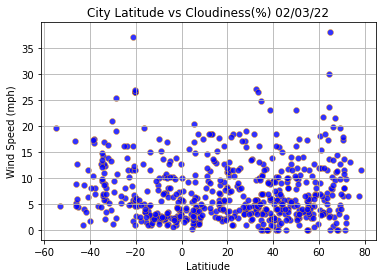

In [27]:
plt.scatter(lats,
          wind_speed, color = "blue",
            edgecolor = "orange", linewidths = 0.5, marker = "o",
           alpha = 0.8, label= "Cities")

plt.title(f"City Latitude vs Cloudiness(%) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitiude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [30]:
from scipy.stats import linregress

In [31]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [37]:
(slope, intercept, rval, pval, stderr) = linregress(lats, temps)
line_eq = " y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

In [38]:
print(line_eq)

 y = -0.45 x + 92.94


In [43]:
print (f"the pvalue is: {pval:.3f}, rvalue is :{rval:.3f}")

the pvalue is: 0.011, rvalue is :-0.759


In [45]:
regress_values = [(lat * slope + intercept) for lat in lats]
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

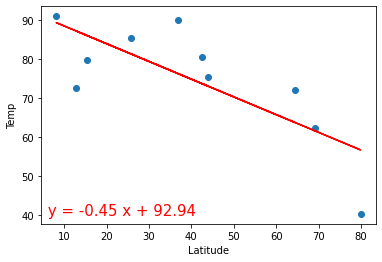

In [52]:
plt.scatter(lats,temps)
plt.plot(lats,regress_values,"r")
plt.annotate(line_eq, (5,40),fontsize=15, color = "red")
plt.ylabel("Temp")
plt.xlabel("Latitude")
plt.show()

In [72]:
#Create a function to create perfrom linear regression
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression
    (slope, intercept,rval, pval, stderr) = linregress(x_values,y_values,)
    
    # Calculate the regression line y value from the slope and intercept
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values,color = "purple",edgecolor = "blue", linewidths = 1.0, alpha = 0.8)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.show()

In [73]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]
                                    

In [74]:
x_values = northern_hemi_df["Lat"]
y_values =  northern_hemi_df["Max Temp"]

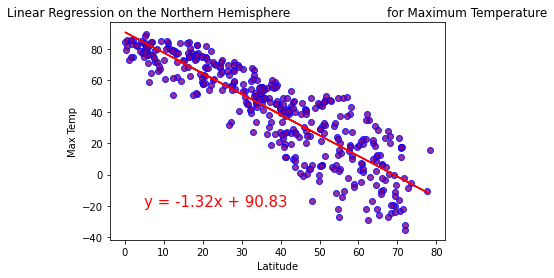

In [75]:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(5,-20))

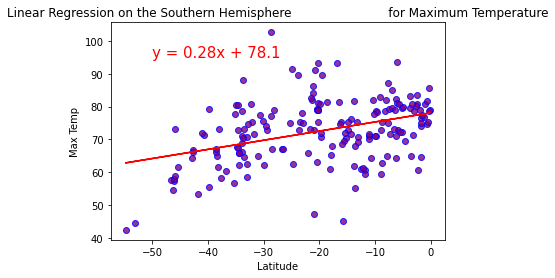

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", "Max Temp",(-50,95))

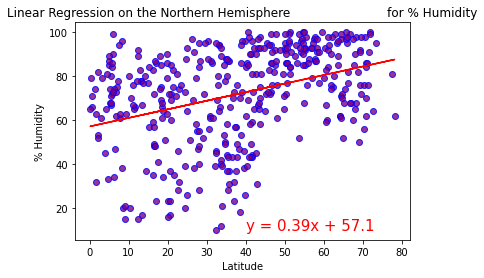

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

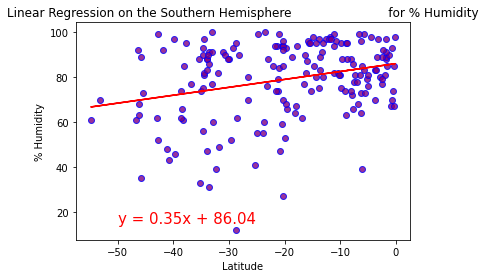

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

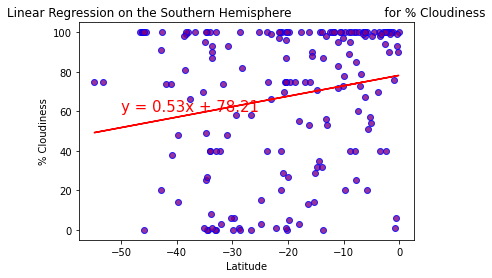

In [85]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for % Cloudiness", "% Cloudiness", (-50,60))

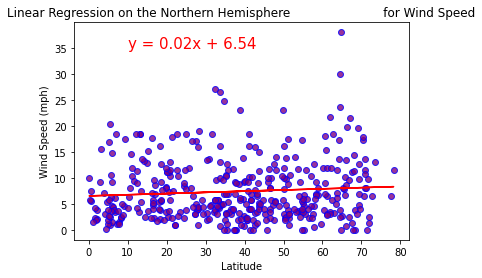

In [89]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \
                       for Wind Speed", "Wind Speed (mph)", (10,35))

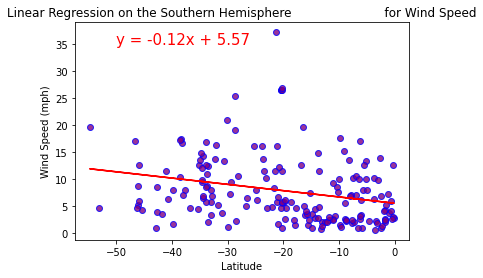

In [91]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for Wind Speed", "Wind Speed (mph)", (-50,35))